### Importing the necessary libraries

In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
import cv2

###  Plotting the histograms

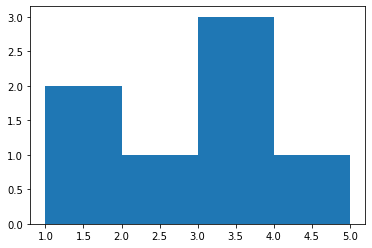

In [2]:
#use pyplot to plot the histogram
values = [1.1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
plt.hist(values,bins = 4, range = (1,5))
plt.show()

### Plotting weighted histograms

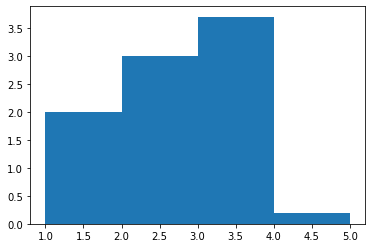

In [3]:
#plot the weighted histograms
values = [1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
weights = [1., 1., 3., 1.2, 1.4, 1.1, 0.2]
plt.hist(values, bins = 4, range = (1,5), weights=weights)
plt.show()

###  Preparing an array to demonstrate HoG

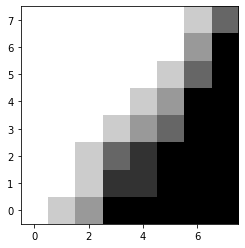

In [4]:
#prepare the image to demonstrate HOG
cell = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5],
    [0, 0, 0, 0, 0, 0, 2, 5],
    [0, 0, 0, 0, 0, 0, 1, 3],
    ],dtype='float64')
plt.imshow(cell, cmap = 'binary',origin = 'lower')
plt.show()

### Calculating Histograms of Oriented Gradients (HOG)

In [5]:
#calculate the histograms of oriented gradients
gradx = cv2.Sobel(cell, cv2.CV_64F,1,0,ksize = 1)
grady = cv2.Sobel(cell,cv2.CV_64F,0,1,ksize = 1)
norm , angles = cv2.cartToPolar(gradx,grady,angleInDegrees = True)

###  Plotting the norm and showing the magnitude

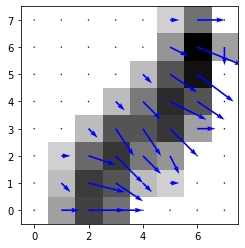

In [6]:
#plotting the norm and showing the magnitude
plt.imshow(norm,cmap = 'binary', origin = 'lower')
q = plt.quiver(gradx,grady,color='blue')
plt.show()

### Plotting HOG using pyplot

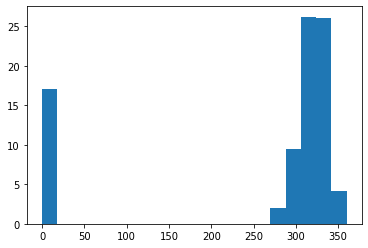

In [7]:
#Plot HOG values using pyplot
plt.hist(angles.reshape(-1),weights=norm.reshape(-1),bins = 20,range = (0,360))
plt.show()

###  Loading detector

In [8]:
#load the HOG based human detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

### Loading the video and reading the frame

In [9]:
#load the video from given path and read a frame using cv
videopath = '/video.mp4'
video = cv2.VideoCapture(videopath)
ret = True
#ret says whether the frame was successfully read
ret,frame = video.read()

###  Detecting the pedestrian

In [10]:
#detect the pedestrian 
resize = cv2.resize(frame,(640,480))
gray = cv2.cvtColor(resize,cv2.COLOR_BGR2GRAY)
boxes,weights = hog.detectMultiScale(resize, winStride = (8,8))

###  Labelling and visualizing the image with detected boxes

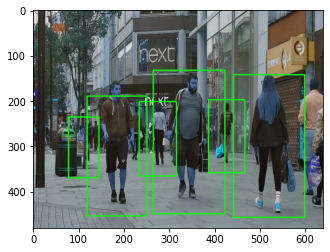

In [11]:
#draw the boxes on the image and visualize it
boxes = np.array([[x,y,x+w,h+y] for (x,y,w,h) in boxes])
for (x,y,w,h) in boxes:
    cv2.rectangle(resize,(x,y),(w,h),(0,255,0),2)
frame = Image.fromarray(resize)
plt.imshow(frame)

###  Looping over previous steps

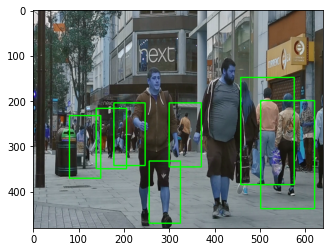

In [ ]:
#examine the whole video for pedestrians
while ret:
    ret,frame = video.read()
    resize = cv2.resize(frame,(640,480))
    gray = cv2.cvtColor(resize,cv2.COLOR_BGR2GRAY)
    boxes,weights = hog.detectMultiScale(resize, winStride = (8,8))
    boxes = np.array([[x,y,x+w,h+y] for (x,y,w,h) in boxes])
    for (x,y,w,h) in boxes:
        cv2.rectangle(resize,(x,y),(w,h),(0,255,0),2)
    frame = Image.fromarray(resize)
    plt.imshow(frame)
    display.clear_output(wait = True)
    display.display(plt.gcf())
video.release()
    